In [ ]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

41


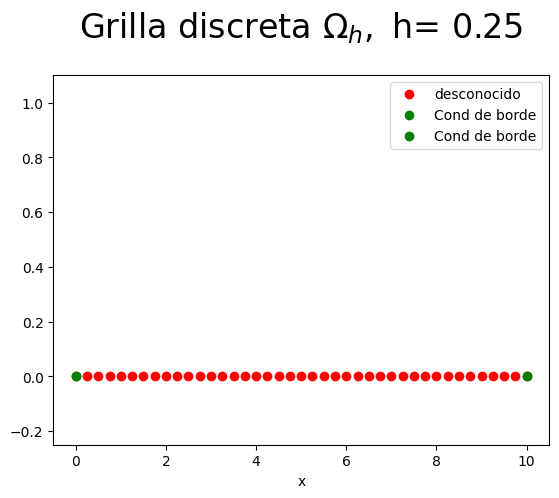

In [ ]:
N=40
left = 0
right = 10
h=(right-left)/(N)
x=np.arange(left,right+h,h)
print(len(x))

plt.plot(x, np.zeros(len(x)),'ro',label='desconocido');
plt.plot(left, 0,'go',label='Cond de borde');
plt.plot(right, 0,'go',label='Cond de borde');
#plt.xlim((-0.1,2.1))
plt.ylim((-0.25,1.1))
plt.xlabel('x')
#plt.ylabel('y')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Grilla discreta $\Omega_h,$ h= %s'%(h),fontsize=24,y=1.08)
plt.legend()
plt.show();

Definimos f

In [ ]:
#def f(x):
#  return(2*np.cos(x)/(np.exp(x)))

In [ ]:
def f(x):
  return(12*x*x)

Definimos g que sabemos que es solución exacta

In [ ]:
def g(x):
  return(np.sin(x)/(np.exp(x)))

In [ ]:
w=np.zeros((N+1))
alpha = g(left)
beta = g(right)

w[0]=g(left) #Condicion de borde a izquierda
w[N]=g(right) #Condicion de borde a derecha

(41, 41)


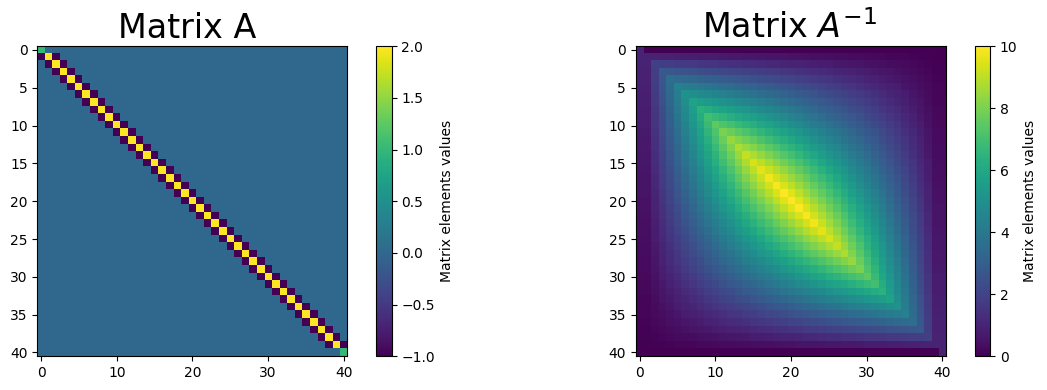

In [ ]:
from scipy.sparse import diags
import numpy as np
#Definimos las diagonales de la matriz y las colocamos en la matriz con diags
du=np.array([-1 for i in range(N)])
d=(2)*np.array([1 for i in range(N+1)])
dl=np.array([-1 for i in range(N)])
matriz_aux = [du,d,dl]
offset = [-1,0,1]
A=diags(matriz_aux,offset).toarray()
print(A.shape)
A[0][0] = 1
A[0][1] = 0
A[N][N] = 1
A[N][N-1] = 0

Ainv=np.linalg.inv(A)
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [ ]:
r=np.zeros(N+1)

# vector r
for i in range (1,N-1):
    r[i]= h*h*(f(x[i]))
r[0] = g(left)
r[N] = g(right)
#b_left_right=np.zeros(N+1)
#b_left_right[0]=g(left) # Left Boundary
#b_left_right[N]=g(right)# Right Boundary

#b=b_left_right

In [ ]:
C=np.dot(Ainv,r)
#w[1:N,1:N]=C.reshape((N-1,N-1))
'''
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();
'''

"\nfig = plt.figure(figsize=(8,6))\nax = fig.add_subplot(111, projection='3d');\n# Plot a basic wireframe.\nax.plot_wireframe(X, Y, w,color='r');\nax.set_xlabel('x');\nax.set_ylabel('y');\nax.set_zlabel('w');\nplt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);\nplt.show();\n"

In [ ]:
U = list(C)
U.insert(0,g(left))
U.insert(N,g(right))

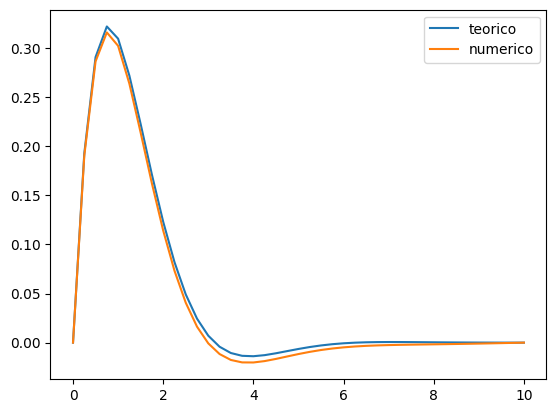

In [ ]:
plt.plot(x,g(x), label = 'teorico')
plt.plot(x,C, label = 'numerico')
plt.legend()

Condiciones de Neumann

Primero resolvemos con forward

(41, 41)


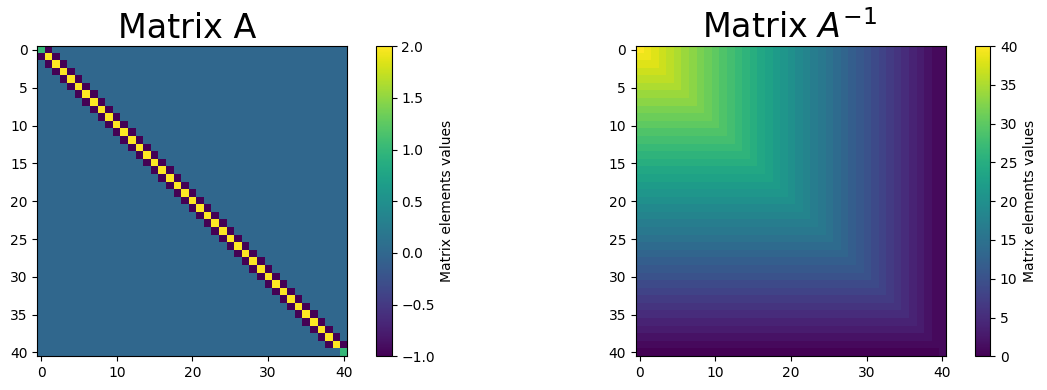

In [ ]:
from scipy.sparse import diags
import numpy as np
#Definimos las diagonales de la matriz y las colocamos en la matriz con diags
N=40
left = 0
right = 1
h=(right-left)/(N)
x=np.arange(left,right+h,h)
#print(x)

du=np.array([-1 for i in range(N)])
d=(2)*np.array([1 for i in range(N+1)])
dl=np.array([-1 for i in range(N)])
matriz_aux = [du,d,dl]
offset = [-1,0,1]
A=diags(matriz_aux,offset).toarray()
A[0][0] = 1
A[0][1] = -1
A[N][N] = 1
A[N][N-1] = 0
print(A.shape)


Ainv=np.linalg.inv(A)
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [ ]:
r=np.zeros(N+1)

# vector r
for i in range(1,N-1):
    r[i]= h*h*(f(x[i]))
r[0] = 0
r[N] = 0

#b_left_right=np.zeros(N+1)
#b_left_right[0]=g(left) # Left Boundary
#b_left_right[N]=g(right)# Right Boundary

#b=b_left_right

In [ ]:
C=np.dot(Ainv,r)

In [ ]:
def exacta(x):
  return(x**4-1)

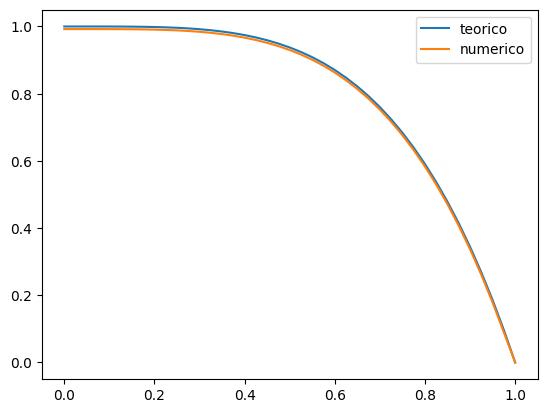

In [ ]:
plt.plot(x,-exacta(x), label = 'teorico')
plt.plot(x,np.array(C), label = 'numerico')
plt.legend()

In [ ]:
C[0]

40.665363171688654

In [ ]:
f(x[0])

2.0

Lo hacemos con centradas y nodo ficticio

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]
(41, 41)


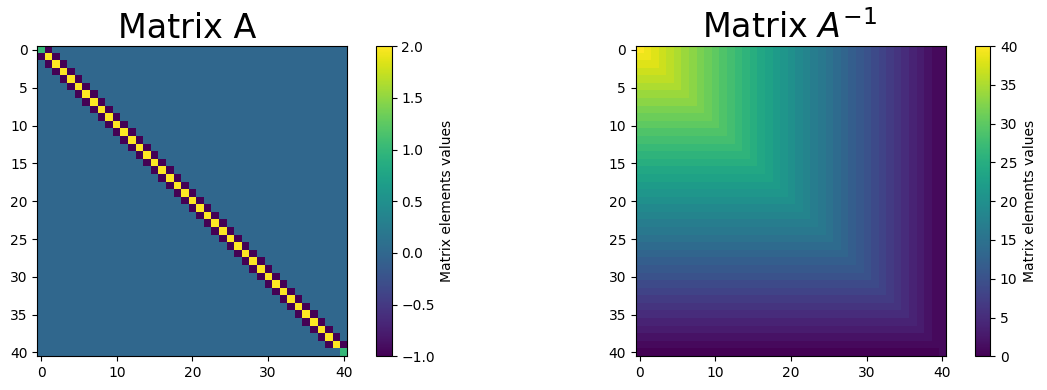

In [ ]:
from scipy.sparse import diags
import numpy as np
#Definimos las diagonales de la matriz y las colocamos en la matriz con diags
N=40
left = 0
right = 1
h=(right-left)/(N)
x=np.arange(left,right+h,h)
print(x)

du=np.array([-1 for i in range(N)])
d=(2)*np.array([1 for i in range(N+1)])
dl=np.array([-1 for i in range(N)])
matriz_aux = [du,d,dl]
offset = [-1,0,1]
A=diags(matriz_aux,offset).toarray()
A[0][0] = 1
A[0][1] = -1
A[N][N] = 1
A[N][N-1] = 0
print(A.shape)


Ainv=np.linalg.inv(A)
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [ ]:
r=np.zeros(N+1)

# vector r
for i in range(1,N):
    r[i]= h*h*(f(x[i]))
r[0] = h*h*(f(x[0]))
r[N] = 0
print(len(r))
#b_left_right=np.zeros(N-1)
#b_left_right[0]=g(left) # Left Boundary
#b_left_right[N-2]=g(right)# Right Boundary

#b=b_left_right


41


In [ ]:
C=np.dot(Ainv,r)

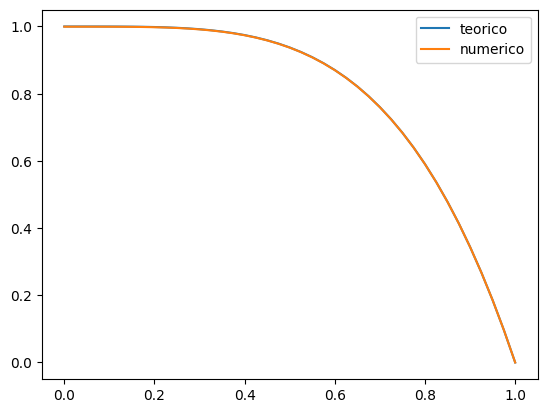

In [ ]:
plt.plot(x,-exacta(x), label = 'teorico')
plt.plot(x,np.array(C), label = 'numerico')
plt.legend()